In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('../data/trash-amounts-tourist.csv')
df['Tonnage'] = pd.to_numeric(df['Tonnage'].str.replace(',', '.'))
df = df.groupby(['Year', 'Month', 'Tour_Arrivals','Tour_Stays','Avg_Daily_Arrivals', 'Avg_Daily_Stays'])['Tonnage'].mean().reset_index()
df.head(70)

,Year,Month,Tour_Arrivals,Tour_Stays,Avg_Daily_Arrivals,Avg_Daily_Stays,Tonnage
0,2019,1,914931.0,2159841.0,29514.0,69672.0,13.151029
1,2019,2,949002.0,2235628.0,33893.0,79844.0,13.233680
2,2019,3,1110954.0,2642288.0,35837.0,85235.0,13.279736
3,2019,4,1184986.0,3009169.0,39500.0,100306.0,13.325477
4,2019,5,1277674.0,3010462.0,41215.0,97112.0,12.855768
5,2019,6,1244717.0,3047930.0,41491.0,101598.0,12.845920
6,2019,7,1225219.0,3216242.0,39523.0,103750.0,11.950636
7,2019,8,1274832.0,3399163.0,41124.0,109650.0,12.461339
8,2019,9,1255860.0,3035799.0,41862.0,101193.0,12.422663
9,2019,10,1273608.0,3120607.0,41084.0,100665.0,12.763866


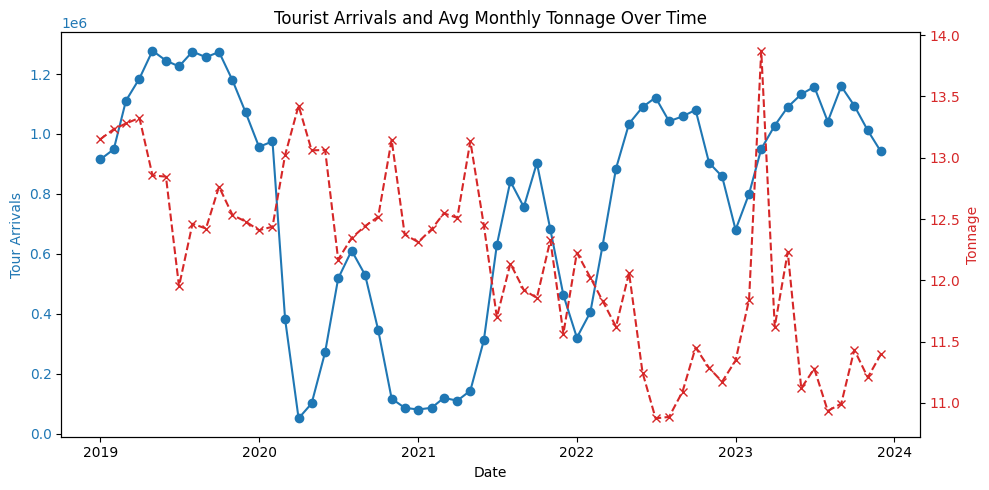

In [70]:
# Combine year and month into a single column for the x-axis
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))  # Assume day 1 for plotting

# Create the plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot Tour_Arrivals on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Tour Arrivals', color='tab:blue')
ax1.plot(df['Date'], df['Tour_Arrivals'], color='tab:blue', marker='o', label='Tour Arrivals')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot Tonnage
ax2 = ax1.twinx()
ax2.set_ylabel('Tonnage', color='tab:red')
ax2.plot(df['Date'], df['Tonnage'], color='tab:red', marker='x', linestyle='--', label='Tonnage')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title and show plot
plt.title('Tourist Arrivals and Avg Monthly Tonnage Over Time')
fig.tight_layout()
plt.show()
